# Berkeley Data Science Modules: Advanced Plotting
<img src="https://jupyter.org/assets/main-logo.svg" style="width: 500px; height: 350px;"/>


### Table of Contents
1.  <a href='#section 1'>Seaborn</a>
2. <a href='#section 2'>Bokeh</a>



In [7]:
# dependencies: THIS CELL MUST BE RUN
!pip install --upgrade numpy -q
!pip install --upgrade bokeh -q

from datascience import *
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh
plt.style.use('fivethirtyeight')
import ipywidgets as widgets
%matplotlib inline

The `matplotlib` library has been used extensively for plotting in modules over the last few semesters. It is the most commonly used plotting library, and is used in a variety of academic classes as well. However, the library (while powerful), still comes with a variety of issues that potentially make it more appealing to use another plotting library.

Examples of these issues include:

1. Confusing/out-of-date documentation
2. Unneccessarily complicated code for simple figure modifications
3. Difficulty in making advanced plots
4. Lack of freedom with figure modification and odd default settings
5. Suboptimal integration with pandas DataFrames

These issues make matplotlib less enticing to use, especially in an educational setting (where clarity, ease of use, and documentation matters a lot).

We will provide some basic examples of two alternate visualization libraries (`seaborn` and `bokeh`), which solve several of the issues outlined above.

Note that this is meant to provide you with some basic exposure to the libraries. The full functionalities are much more extensive than what we will be covering today, and we invite you to spend some time working with the libraries and reading through documentation on your own to learn the true power of what you can do. We can also answer any questions you may have.

## 1. Seaborn - an extension of Matplotlib <a id='section 1'></a>

The `seaborn` library provides a high-level API on top of the base `matplotlib` functionality. While `matplotlib` provides ease of use for basic plot types (scatter, line, pie, etc.), `seaborn` allows you to easily create more advanced plots for statistical visualization. Additionally, its defaults (color, sizing, etc.) are generally more aesthetically appealing. We will go through some examples below using some in-built seaborn datasets. (The code examples have been adapted from the blog post linked in Reference 1). 

We'll first work with the in-built `tips` dataset in `seaborn`.

In [8]:
sns.set()
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Let's start by generating a couple of basic plots to compare with `matplotlib`. Note the ease of use in this visualization as compared to a similar one in `matplotlib`. We will first look at a side-by-side scatter plot, and then a side-by-side lineplot with linear regression.

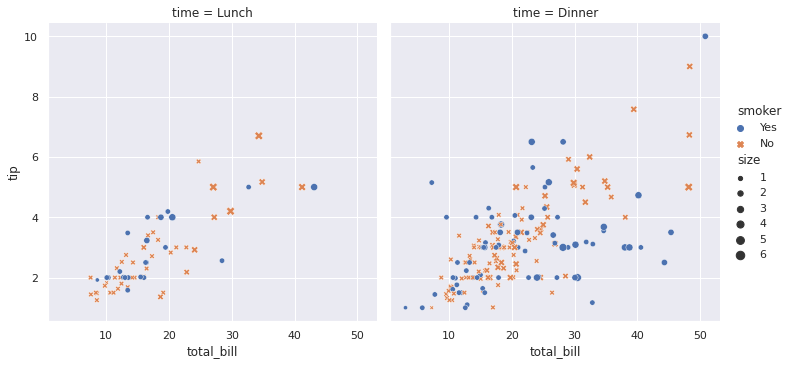

In [9]:
sns.relplot(x="total_bill", y="tip", 
            col="time", # Categorical variables that will determine the faceting of the grid.
            hue="smoker", # Grouping variable that will produce elements with different colors.
            style="smoker", # Grouping variable that will produce elements with different styles.
            size="size", # Grouping variable that will produce elements with different sizes.
            data=tips);

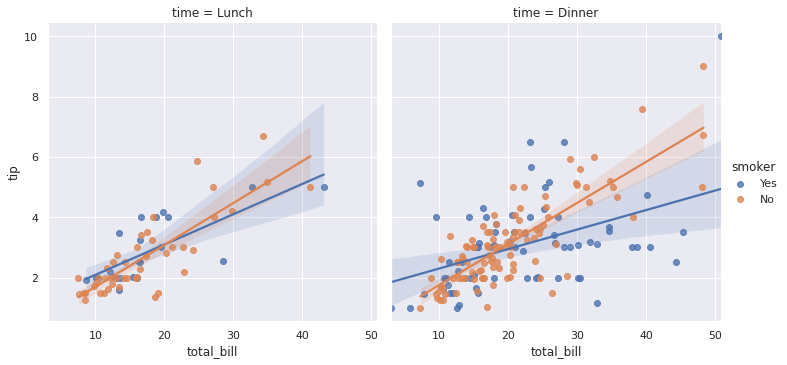

In [10]:
sns.lmplot(x="total_bill", y="tip", 
           col="time", # Categorical variables that will determine the faceting of the grid.
           hue="smoker", # Grouping variable that will produce elements with different colors.
           data=tips);

The true strength of `seaborn` comes in its ability to create advanced plots for statistical visualization that are very difficult to create effectively in `matplotlib`. We will showcase several examples of easy advanced plots for visualization of categorical variables. 

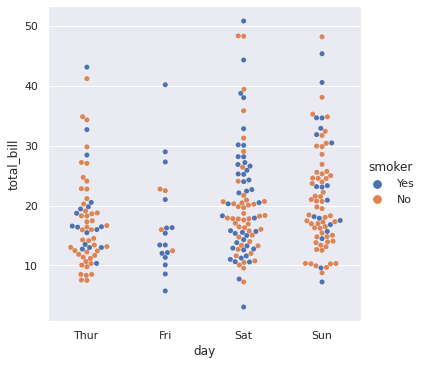

In [11]:
sns.catplot(x="day", y="total_bill", 
            hue="smoker", # Grouping variable that will produce elements with different colors.
            kind="swarm", # Options are: "point", "bar", "strip", "swarm", "box", "violin", or "boxen"
            data=tips);

Let's change the `kind` parameter to see a few more examples of different plots. Note how easy it is!

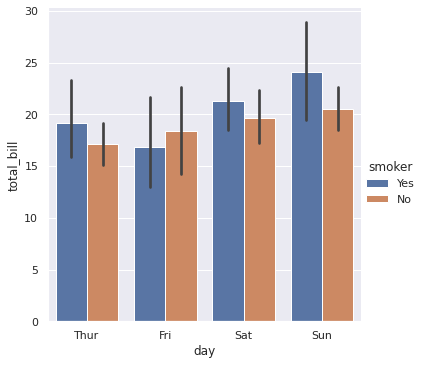

In [12]:
sns.catplot(x="day", y="total_bill", 
            hue="smoker", # Grouping variable that will produce elements with different colors.
            kind="bar", # Options are: "point", "bar", "strip", "swarm", "box", "violin", or "boxen"
            data=tips);

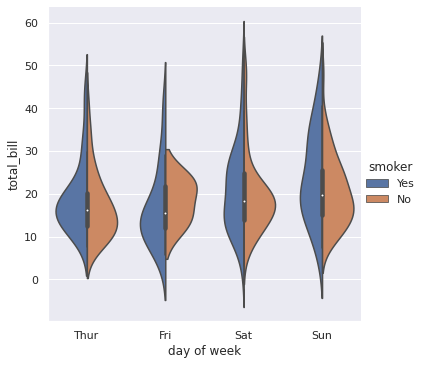

In [13]:
sns.catplot(x="day", y="total_bill", 
            hue="smoker", # Grouping variable that will produce elements with different colors.
            kind="violin", # Options are: "point", "bar", "strip", "swarm", "box", "violin", or "boxen"
            split='True',
            data=tips);

plt.xlabel("day of week");

As you can see from the above examples, `seaborn` is able to solve several of the issues that we mentioned above about `matplotlib` while at the same time offering functionality for plots that are extremely difficult to create with native `matplotlib`. More specifically, in the examples we saw, we avoided the following problems from above:

1. Unneccessarily complicated code for simple figure modifications
2. Difficulty in making advanced plots
3. Suboptimal integration with pandas DataFrames

Note that `seaborn` itself has a vast array of functionality much beyond what was outlined here. This was meant to be a quick demo that got you interested in the power of the library. Feel free to explore on your own to create some awesome visualizations!


## 2. Bokeh - a more functional, interactive version of Matplotlib <a id='section 2'></a>



From the Bokeh documentation: "Bokeh is an interactive visualization library that targets modern web browsers for presentation. Bokeh provides elegant, concise construction of versatile graphics with high-performance interactivity over very large or streaming datasets in a quick and easy way from Python (or other languages)"

Some key takeaways of features that make Bokeh great:

1. Interactive and advanced visualizations
2. Presentation and demonstration
3. Large datasets

We will first outline a few basic plots using Bokeh to showcase the highly interactive nature of the plots as well as the beautiful, presentable nature of the visualizations. (These examples have been adapted from the Bokeh quick start guide linked in Reference 2).

In [14]:
from bokeh.plotting import *
from bokeh.io import output_notebook

output_notebook()

Loading BokehJS ...

In [17]:
x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 4, 5]

p = figure(title="Line plot example", x_axis_label='x', y_axis_label='y')

p.line(x, y, legend_label="Temp.", line_width=2)

show(p)

As you can see, Bokeh plots are extremely interactive, and give you a lot of freedom with visualizing different statistical associations in data. The tools from the previous example are only a subset of all possible tools. In the example, below, we specify what tools we want (the full list outlined in the documentation). We chose to include the box and lasso select tools this time to compare between the two graphs.

In [18]:
from bokeh.models import ColumnDataSource

# prepare some date
N = 300
x = np.linspace(0, 4*np.pi, N)
y0 = np.sin(x)
y1 = np.cos(x)

# NEW: create a column data source for the plots to share
source = ColumnDataSource(data=dict(x=x, y0=y0, y1=y1))

TOOLS = "pan,wheel_zoom,box_zoom,reset,save,box_select,lasso_select"

# create a new plot and add a renderer
left = figure(tools=TOOLS, width=350, height=350, title=None)
left.circle('x', 'y0', source=source)

# create another new plot and add a renderer
right = figure(tools=TOOLS, width=350, height=350, title=None)
right.circle('x', 'y1', source=source)

# put the subplots in a gridplot
p = gridplot([[left, right]])

# show the results
show(p)

The Bokeh documentation is extensive, and provides very detailed information on all types of plots and visualizations. 

Additionally, Bokeh has a incredible gallery of beautiful visualizations on its documentation page at this link: https://bokeh.pydata.org/en/latest/docs/gallery.html

This gallery shows off how robust the library, and what it is capable of. 

Feel free to check out the demos and the respective code to understand the true power of the library! Just as before with `seaborn`, `bokeh` itself has a vast array of functionality much beyond what was outlined here. This was meant to be a quick demo that got you interested in the use cases and power of the library.

Here are a few examples from the gallery to pique your interest further :) (Linked in Reference 3).

In [19]:
import vis
bokeh.sampledata.download() 

Creating /home/jovyan/.bokeh directory
Creating /home/jovyan/.bokeh/data directory
Using data directory: /home/jovyan/.bokeh/data
Downloading: CGM.csv (1589982 bytes)
   1589982 [100.00%]
Downloading: US_Counties.zip (3171836 bytes)
   3171836 [100.00%]
Unpacking: US_Counties.csv
Downloading: us_cities.json (713565 bytes)
    713565 [100.00%]
Downloading: unemployment09.csv (253301 bytes)
    253301 [100.00%]
Downloading: AAPL.csv (166698 bytes)
    166698 [100.00%]
Downloading: FB.csv (9706 bytes)
      9706 [100.00%]
Downloading: GOOG.csv (113894 bytes)
    113894 [100.00%]
Downloading: IBM.csv (165625 bytes)
    165625 [100.00%]
Downloading: MSFT.csv (161614 bytes)
    161614 [100.00%]
Downloading: WPP2012_SA_DB03_POPULATION_QUINQUENNIAL.zip (4816256 bytes)
   4816256 [100.00%]
Unpacking: WPP2012_SA_DB03_POPULATION_QUINQUENNIAL.csv
Downloading: gapminder_fertility.csv (64346 bytes)
     64346 [100.00%]
Downloading: gapminder_population.csv (94509 bytes)
     94509 [100.00%]
Download

In [20]:
vis.gen_texas()

AttributeError: 'tuple' object has no attribute 'reverse'

In [21]:
vis.gen_mis()

In [22]:
vis.gen_hex()

As you see, Bokeh gives you immense visualization power, while at the same time providing interactivity. Explore the gallery and documentation further to learn more about how to create your own great visualizations!

#### References

1. https://towardsdatascience.com/matplotlib-seaborn-basics-2bd7b66dbee2
2. https://bokeh.pydata.org/en/latest/docs/user_guide/quickstart.html
3. https://bokeh.pydata.org/en/latest/docs/gallery.html

Author: Aditya Sheth